In [2]:
import pandas as pd
import soundfile as sf
import io

TODO: download file from here https://huggingface.co/datasets/JacobLinCool/VoiceBank-DEMAND-16k/tree/main/data

In [4]:
train_file = 'train-00000-of-00005.parquet'

# Read the parquet file
df = pd.read_parquet(train_file, engine="pyarrow")

len(df)

2315

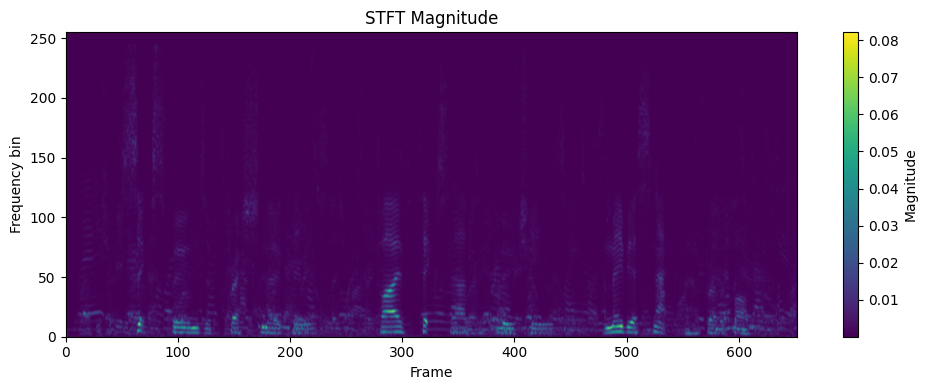

(256, 653)


In [51]:
from jax.scipy.signal import stft
import numpy as np

import matplotlib.pyplot as plt

# Decode audio bytes to waveform
audio_array, sr = sf.read(io.BytesIO(df.loc[2]['noisy']['bytes']))

# Compute STFT
hop_length = 128
_, _, Zxx = stft(audio_array, fs=sr, nfft=510, nperseg=510 - 128)

# Plot STFT magnitude
plt.figure(figsize=(10, 4))
plt.pcolormesh(np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency bin')
plt.xlabel('Frame')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()


print(Zxx.shape)


In [35]:
import jax.numpy as jnp

audio_array_list = []
audio_sr_list = []
audio_array_lengths = []
for i in range(0,len(df)):
    # Decode audio bytes to waveform
    audio_array, sr = sf.read(io.BytesIO(df.loc[i]['noisy']['bytes']))
    audio_array_list.append(audio_array)
    audio_sr_list.append(sr)
    audio_array_lengths.append(len(audio_array))

# Compute STFT
_, _, Zxx = stft(audio_array, fs=sr, nperseg=512)

print(Zxx.shape)
jnp.stack((Zxx.real, Zxx.imag),axis=2).shape

(257, 221)


(257, 221, 2)

(array([   0.,    0.,    0.,    0.,    0., 2315.,    0.,    0.,    0.,
           0.]),
 array([15999.5, 15999.6, 15999.7, 15999.8, 15999.9, 16000. , 16000.1,
        16000.2, 16000.3, 16000.4, 16000.5]),
 <BarContainer object of 10 artists>)

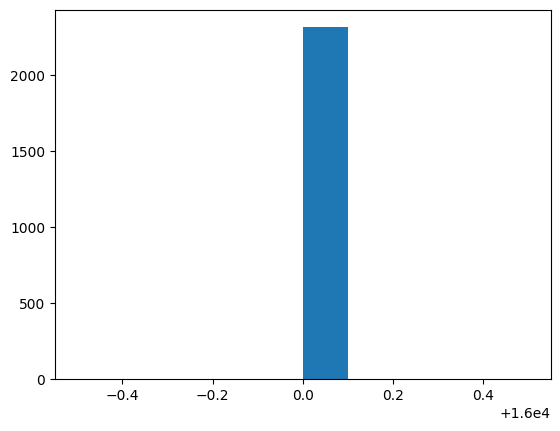

In [36]:
plt.hist(audio_sr_list)

np.int64(19515)

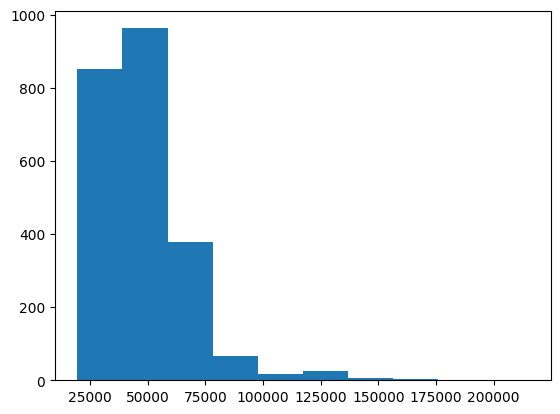

In [34]:
plt.hist(audio_array_lengths)
np.min(audio_array_lengths)

In [21]:
print(Zxx[1])

[ 2.9382587e-03-3.4593511e-03j  2.7876976e-03+1.9228552e-03j
 -1.6220966e-03-1.4346221e-04j -7.3286984e-03-4.0532118e-03j
  6.2276293e-03-1.3752692e-04j  2.2480525e-03+1.6956333e-03j
  5.6897104e-04+3.8265027e-03j -5.4220357e-03-8.3755108e-04j
  1.6826197e-03-5.0170217e-03j  3.3202474e-03+2.0257360e-03j
  9.2523487e-04+4.0170335e-04j -6.4208084e-03+4.4044629e-03j
 -4.6433387e-03-3.9003608e-03j  7.0634037e-03-4.1679741e-04j
  2.9495549e-03+2.5889743e-04j -4.6273082e-04+6.5713469e-03j
 -9.5790252e-03-4.9065878e-03j  5.6394972e-03-2.1923399e-03j
  4.4604964e-03-2.3630908e-04j  8.4708596e-04+4.3498902e-03j
 -7.2718160e-03-8.0620102e-04j  3.5743800e-04-2.1698386e-03j
  6.0966485e-03+1.0573544e-04j -7.9990365e-04+3.6737542e-03j
 -2.2447754e-03-3.1354104e-04j -1.6646145e-03+1.2023654e-04j
  1.7683536e-03-7.1726283e-03j  4.7326037e-03+4.7673038e-03j
 -4.4857166e-03-7.8800420e-04j -3.1218708e-03+9.6302386e-04j
  1.6652956e-03-5.0502005e-03j  1.2741593e-03+3.7391279e-03j
 -1.6285155e-03+1.155696

(83040,)
16000


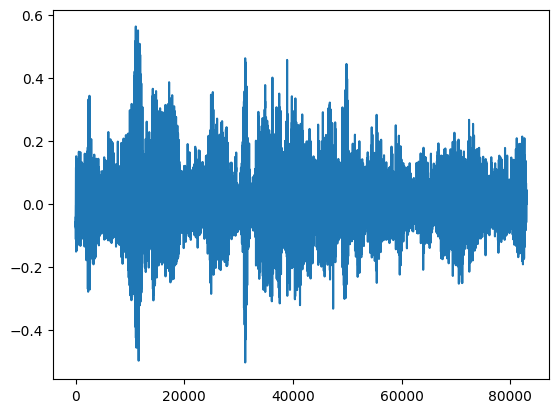

In [15]:
print(audio_array.shape)
print(sr)
plt.plot(audio_array)

(118735,)
16000


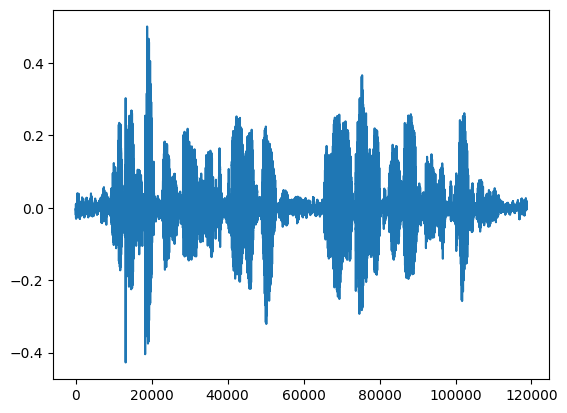

In [17]:
print(audio_array.shape)
print(sr)
plt.plot(audio_array)

In [7]:
Zxx.shape

(257, 245)

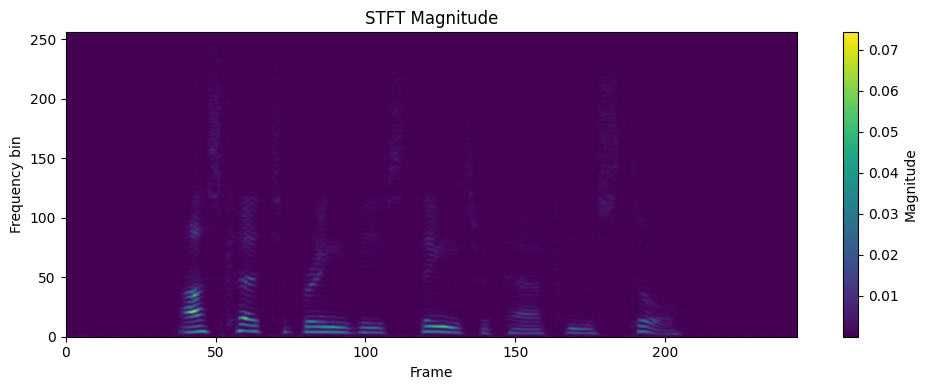

In [20]:
# Decode audio bytes to waveform
audio_array, _ = sf.read(io.BytesIO(df.loc[1]['clean']['bytes']))

# Compute STFT
_, _, Zxx = stft(audio_array, fs=sr, nperseg=512)

# Plot STFT magnitude
plt.figure(figsize=(10, 4))
plt.pcolormesh(np.abs(Zxx), shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency bin')
plt.xlabel('Frame')
plt.colorbar(label='Magnitude')
plt.tight_layout()
plt.show()

In [1]:
Zxx.shape

NameError: name 'Zxx' is not defined